In [1]:
import numpy as np
from sklearn.datasets import make_classification
from cop_kmeans import CopKMeans
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=2111)
print(X[:5], y[:5])

[[-0.35524585 -0.01399758]
 [-1.53328614 -1.08550489]
 [-1.47795834  1.34118634]
 [-1.0939986  -1.69501339]
 [-0.7504019  -0.90569095]] [0 0 2 0 0]


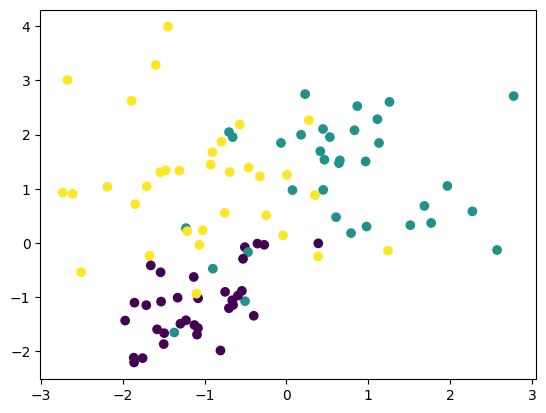

In [8]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
model = CopKMeans(3, 200)

In [4]:
model.fit(X, [], [])

Itération 0
Itération 50
Itération 100
Itération 150


CopKMeans(max_iter=200, n_clusters=3)

In [5]:
prediction = model.predict(X)

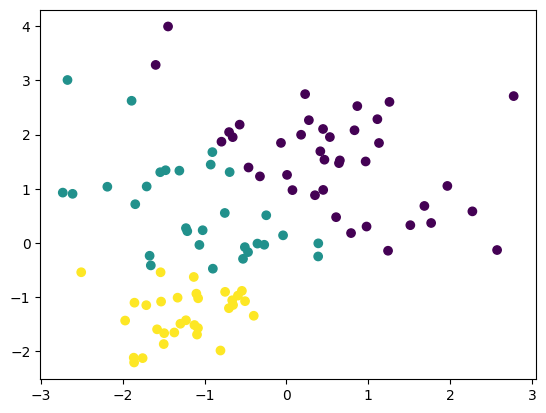

In [7]:
plt.scatter(X[:,0], X[:,1], c=prediction)
plt.show()